![](images/obspy_logo_full_524x179px.png)

<div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.9) ; line-height: 100%">ObsPy: scaricare i dati di un terremoto</div>

---

In [1]:
%matplotlib inline
from __future__ import print_function
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 12, 8

ObsPy ha clients per accedere direttamente ai dati via...

- FDSN webservices (IRIS, Geofon/GFZ, USGS, NCEDC, SeisComp3 instances, ...)
- ArcLink (EIDA, ...)
- Earthworm
- SeedLink (near-realtime servers)
- NERIES/NERA/seismicportal.eu
- NEIC
- SeisHub (local seismological database)

Questa introduzione mostra come usare il client webservice FDSN. Il webservice FDSN è per adesso il default webservice implementato da molti data centers in tutto il mondo. Clients per altri protocolli lavorano in maniera simile al client FDSN. In questa esercitazione utilizzeremo il FDSN dell'INGV.

#### Dati di forme d'onda

Per questo esempio scegliamo un terremoto avvenuto a Sestola, nell'Appennino Modenese, il 6 Novembre 2017 alle 05:55:53 ora italiana.

1 Trace(s) in Stream:
IV.ZCCA..HHZ | 2017-11-06T04:55:40.600200Z - 2017-11-06T04:56:53.170200Z | 100.0 Hz, 7258 samples


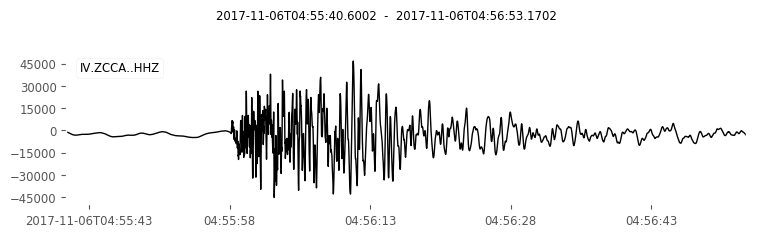

In [2]:
import obspy
from obspy.clients.fdsn import Client

client = Client("INGV")
t = obspy.UTCDateTime("2017-11-06T04:55:53.0")  #Terremoto di Sestola
st = client.get_waveforms("IV", "ZCCA", "", "HHZ",
                          t - 10, t + 60)
print(st)
st.plot()

- di nuovo, i dati delle forma d'onda vengono restitutito come oggetti stream
- per tutti i flussi di lavoro di elaborazione personalizzati, non importa se i dati provengono da un file locale o da un servizio Web


#### Metadati degli eventi 

Il client FDSN può essere usato per richiedere metadati degli eventi: 

1 Event(s) in Catalog:
2017-11-06T04:55:53.360000Z | +44.262,  +10.789 | 3.1 ML | manual


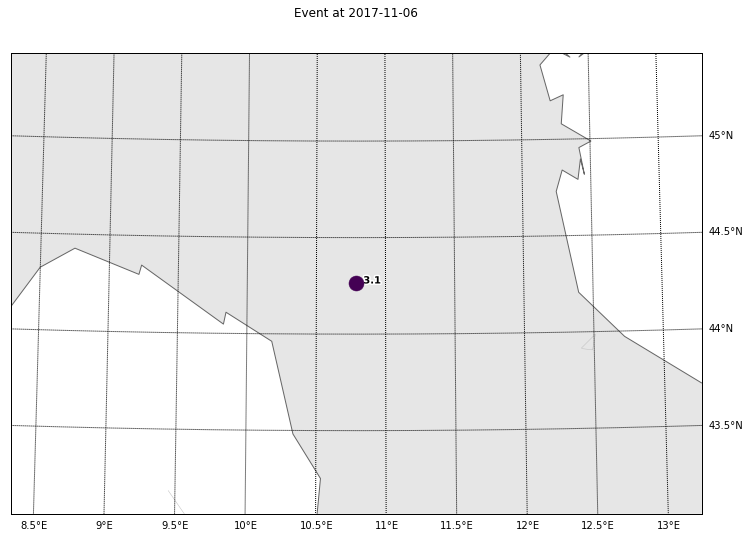

In [3]:
t = obspy.UTCDateTime("2017-11-06T04:55:53.0") #Terremoto di Sestola
catalog = client.get_events(starttime=t - 10 , endtime=t + 10,
                            minmagnitude=2)
print(catalog)
catalog.plot(projection='local');

Le richieste possono avere una vasta gamma di vincoli (vedi [ObsPy Documentation](http://docs.obspy.org/packages/autogen/obspy.clients.fdsn.client.Client.get_events.html)):

- intervallo di tempo
- intervallo geografico (lonlat-box, cerchio con distanza)
- intervallo di profondità
- intervallo di magnitudo, tipo
- agenzia contributiva

#### Metadati delle stationi

Infine, il client FDSN può essere utilizzato per richiedere i metadati della stazione. Le stazioni possono essere consultate utilizzando una vasta gamma di vincoli (vedi [ObsPy documentation](http://docs.obspy.org/packages/autogen/obspy.clients.fdsn.client.Client.get_stations.html)):

 * codice network/station
 * intervallo di tempo di funzionamento
 * geografico (lonlat-box, circolare per distanza)

Inventory created at 2018-04-23T16:52:40.000000Z
	Created by: INGV-CNT WEB SERVICE: fdsnws-station | version: 1.1.40
		    http://webservices.ingv.it/fdsnws/station/1/query?latitude=44.2623&...
	Sending institution: SeisNet-mysql (INGV-CNT)
	Contains:
		Networks (4):
			GU, IV, MN, Z3
		Stations (13):
			GU.CARD (CARD)
			GU.GSCL (GUSCIOLA)
			GU.POPM (Popiglio)
			GU.SARM (San Romano in Garfagnana)
			IV.BDI (BAGNI DI LUCCA)
			IV.FNVD (FONTANA VIDOLA)
			IV.MODE (Modena)
			IV.MPPT (Montemurlo)
			IV.MTCR (MTCR)
			IV.PTF (Montebello)
			IV.ZCCA (ZOCCA)
			MN.VLC (Villacollemandina, Italy)
			Z3.A306A (Viano (RE), Italy)
		Channels (96):
			GU.CARD..HHZ, GU.CARD..HHN, GU.CARD..HHE, GU.GSCL..HHZ, 
			GU.GSCL..HHN, GU.GSCL..HHE, GU.POPM..BHZ, GU.POPM..BHN, 
			GU.POPM..BHE, GU.POPM..HHZ, GU.POPM..HHN, GU.POPM..HHE, 
			GU.POPM..LHZ, GU.POPM..LHN, GU.POPM..LHE, GU.POPM..VHZ, 
			GU.POPM..VHN, GU.POPM..VHE, GU.SARM..EHZ, GU.SARM..EHN, 
			GU.SARM..EHE, IV.BDI..BHZ, IV.BDI..BHN, IV.BDI..B

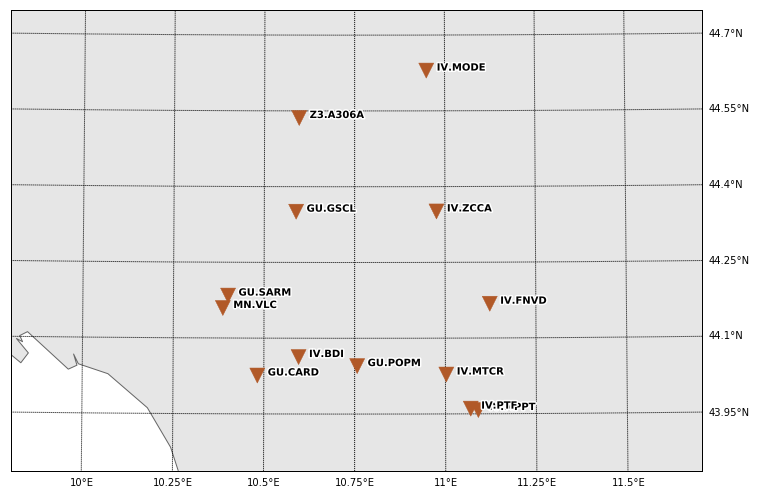

In [4]:
event = catalog[0]
origin = event.origins[0]


lon = origin.longitude
lat = origin.latitude

# Get currently active stations in 5 km radius around Livermore.
inventory = client.get_stations(longitude=lon, latitude=lat,
                                maxradius=50.0/111, level="channel", 
                                starttime=obspy.UTCDateTime())
print(inventory)
inventory.plot(projection="local", resolution="i");

La parola-chiave **`level=...`** è usata per specificare il livello di dettaglio nell'inventario richiesto

- `"network"`: restituisce solo informazioni sulle reti che corrispondono ai criteri
- `"station"`: restituisce informazioni su tutte le stazioni corrispondenti
- `"channel"`: restituisce le informazioni sui canali disponibili in tutte le reti di stazioni che soddisfano i criteri
- `"response"`: include la risposta dello strumento per tutti i canali corrispondenti (grande dimensione dei dati dei risultati!)

In [5]:
inventory = client.get_stations(network="IV", station="ERBM",
                                level="station")
print(inventory)

Inventory created at 2018-04-23T16:52:44.000000Z
	Created by: INGV-CNT WEB SERVICE: fdsnws-station | version: 1.1.40
		    http://webservices.ingv.it/fdsnws/station/1/query?level=station&net...
	Sending institution: SeisNet-mysql (INGV-CNT)
	Contains:
		Networks (1):
			IV
		Stations (1):
			IV.ERBM (EREMO DI BISMANTOVA)
		Channels (0):



In [6]:
inventory = client.get_stations(network="IV", station="ERBM",
                                level="channel")
print(inventory)

Inventory created at 2018-04-23T16:52:44.000000Z
	Created by: INGV-CNT WEB SERVICE: fdsnws-station | version: 1.1.40
		    http://webservices.ingv.it/fdsnws/station/1/query?level=channel&net...
	Sending institution: SeisNet-mysql (INGV-CNT)
	Contains:
		Networks (1):
			IV
		Stations (1):
			IV.ERBM (EREMO DI BISMANTOVA)
		Channels (12):
			IV.ERBM..EHZ (4x), IV.ERBM..EHN (4x), IV.ERBM..EHE (4x)


Per le richieste di forme d'onda che includono la correzione dello strumento, è necessario scaricare anche le informazioni di risposta dello strumento appropriate.

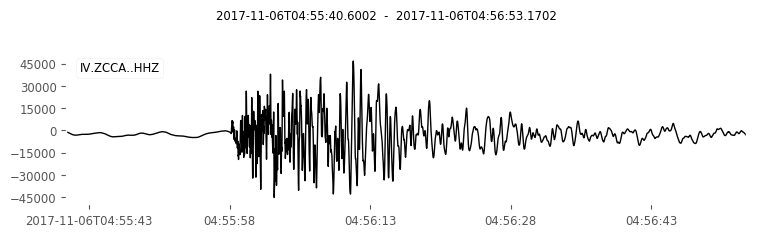

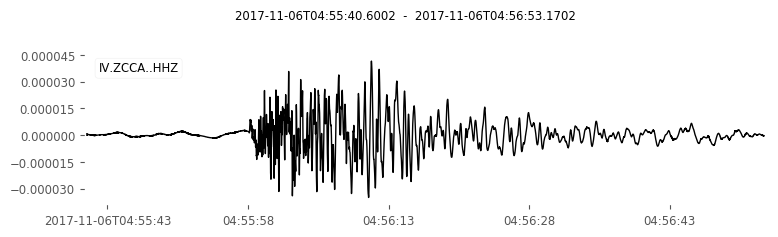

In [7]:
t = obspy.UTCDateTime("2017-11-06T04:55:53.0")
st = client.get_waveforms("IV", "ZCCA", "", "HHZ", t - 10, t + 60)
inv = client.get_stations(network="IV", station="ZCCA", location="", channel="HHZ",
                          level="response", starttime=t - 10, endtime=t + 10)
st.plot()

st.remove_response(inventory=inv)
st.plot()


#### Esercizio: calcolo della magnitudo per il terremoto di Sestola

Applichiamo quanto imparato nell'esempio calcolando la magnitudo locale del terremoto di Sestola

In [85]:
#tempo origine del terremoto
t = obspy.UTCDateTime("2017-11-06T04:55:53.0")

In [86]:
#creiamo il catalogo con l'evento
catalog = client.get_events(starttime=t - 10 , endtime=t + 10,
                            minmagnitude=2)

In [87]:
#creiamo una lista di stazioni vicine
# Get currently active stations in 5 km radius around Livermore.
inventory = client.get_stations(longitude=lon, latitude=lat,
                                maxradius=50.0/111, level="response", 
                                starttime=obspy.UTCDateTime())

7 Trace(s) in Stream:
GU.CARD..HHE | 2017-11-06T04:55:45.800000Z - 2017-11-06T04:56:23.490000Z | 100.0 Hz, 3770 samples
GU.GSCL..HHE | 2017-11-06T04:55:45.900000Z - 2017-11-06T04:56:25.290000Z | 100.0 Hz, 3940 samples
GU.POPM..HHE | 2017-11-06T04:55:44.180000Z - 2017-11-06T04:56:23.830000Z | 100.0 Hz, 3966 samples
IV.BDI..HHE  | 2017-11-06T04:55:47.660000Z - 2017-11-06T04:56:24.070000Z | 100.0 Hz, 3642 samples
IV.FNVD..HHE | 2017-11-06T04:55:45.820200Z - 2017-11-06T04:56:23.920200Z | 100.0 Hz, 3811 samples
IV.ZCCA..HHE | 2017-11-06T04:55:45.720000Z - 2017-11-06T04:56:23.030000Z | 100.0 Hz, 3732 samples
MN.VLC..HHE  | 2017-11-06T04:55:47.968392Z - 2017-11-06T04:56:24.958392Z | 100.0 Hz, 3700 samples


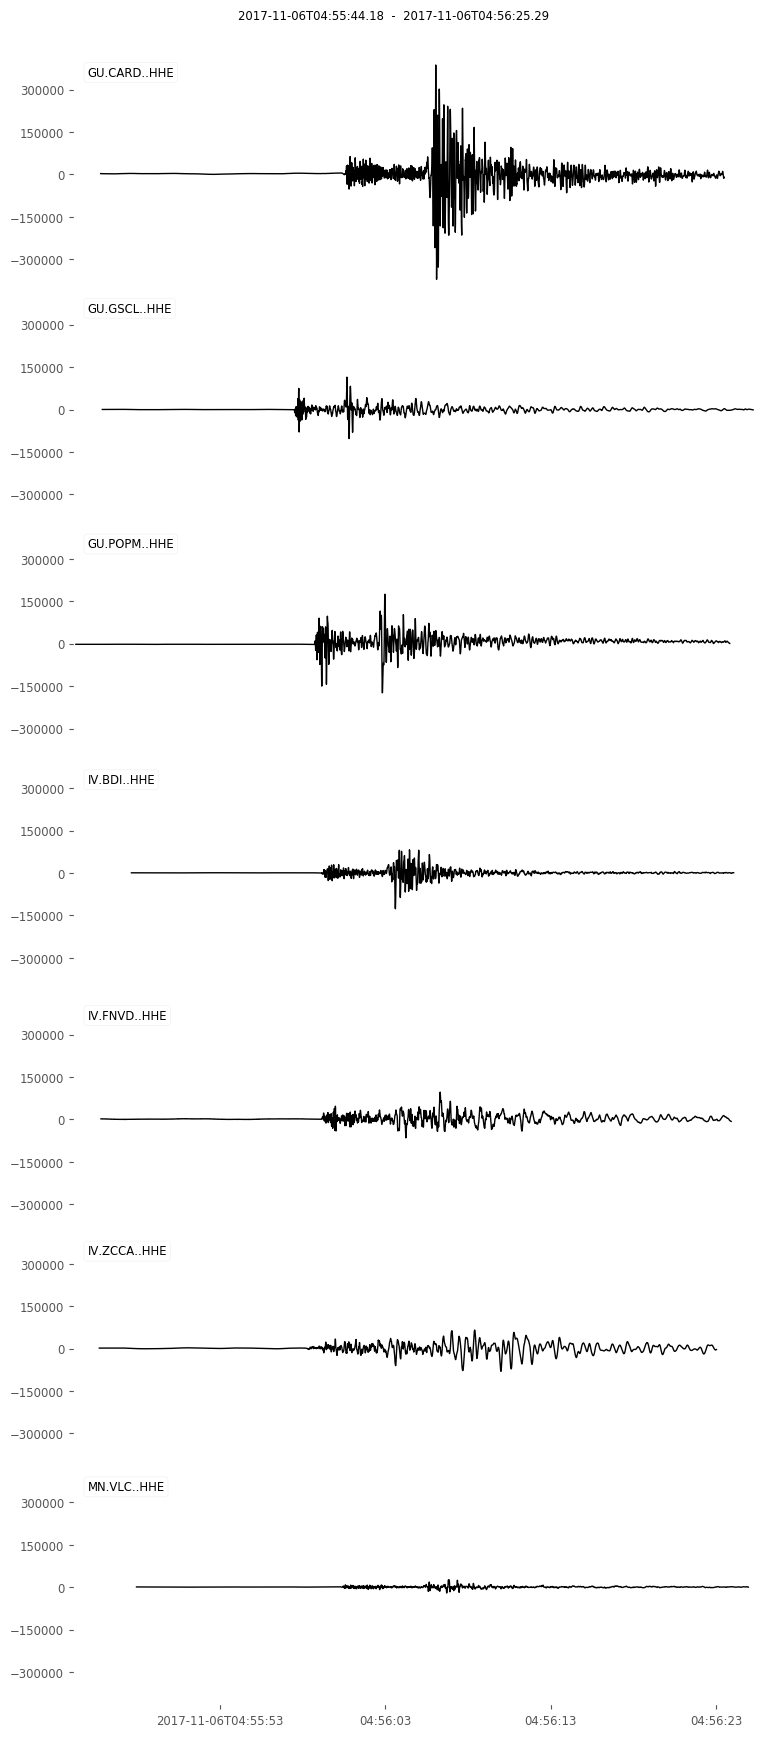

In [88]:
from obspy import Stream
st = Stream()

for network in inventory:
    for station in network:
        try:
            st += client.get_waveforms(network.code, station.code, "*", "HHE",
                                       t - 5 , t + 30)
        except:
            pass

print(st)
st.plot()

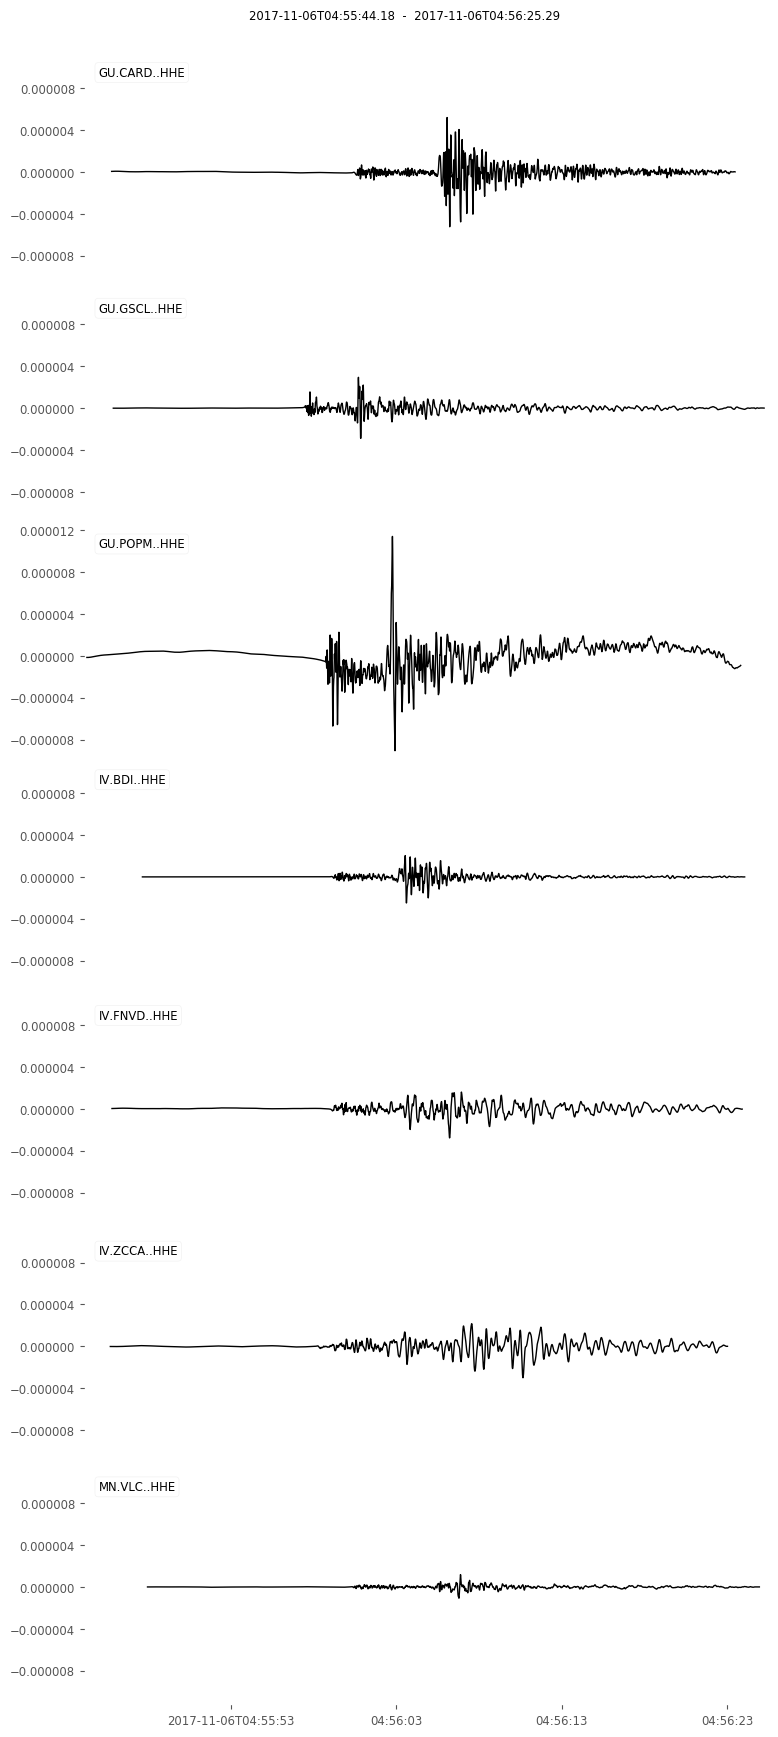

In [89]:
st.detrend('demean')
st.detrend('linear')
st.remove_response(inventory=inventory, water_level=20,output='DISP')
st.plot()

In [90]:
for t in st:
    print(t.id,t.max())

GU.CARD..HHE -5.22550983521e-06
GU.GSCL..HHE 2.94402579484e-06
GU.POPM..HHE 1.14160245472e-05
IV.BDI..HHE -2.49063222857e-06
IV.FNVD..HHE -2.77869145308e-06
IV.ZCCA..HHE -2.99999667816e-06
MN.VLC..HHE 1.17852046351e-06


In [91]:
# per rimuovere una traccia si può fare nel modo seguente:
#for t in st.select(station='POPM'):
#    st.remove(t)

In [92]:
for t in st:
    print(t.id,t.max())

GU.CARD..HHE -5.22550983521e-06
GU.GSCL..HHE 2.94402579484e-06
GU.POPM..HHE 1.14160245472e-05
IV.BDI..HHE -2.49063222857e-06
IV.FNVD..HHE -2.77869145308e-06
IV.ZCCA..HHE -2.99999667816e-06
MN.VLC..HHE 1.17852046351e-06


In [93]:
from math import log10
from obspy.geodetics import gps2dist_azimuth

In [94]:
event = catalog[0]
origin = event.origins[0]
elon = origin.longitude
elat = origin.latitude


In [95]:
# troviamo le coordinate di una stazione
staz=st[0].id
print(staz)
coords = inventory.get_coordinates(staz)
print(coords)

GU.CARD..HHE
{'latitude': 44.026, 'longitude': 10.4821, 'elevation': 380.0, 'local_depth': 0.0}


In [96]:
# calcoliamo la distanza dall'evento con gps2dist_azimuth(lat1,lon1,lat2,lon2)

dist,az,baz = gps2dist_azimuth(elat,elon,coords['latitude'],coords['longitude'])

In [97]:
# per esprimere la distanza in km occorre dividere per 1000
dist/1000

35.922330548267425

# Formula per il calcolo della magnitudo:

# ML = log(AMP) +1.11 * log(DIST) + 0.00189 * DIST + 3.591

## AMP è lo spostamento massimo espresso in mm
## DIST è la distanza stazione - ipocentro espressa in km



In [99]:
amag = 0.0
for t in st:
    coords = coords = inventory.get_coordinates(t.id)
    DIST,az,baz = gps2dist_azimuth(elat,elon,coords['latitude'],coords['longitude'])
    DIST = DIST/1000
    AMP = abs(t.max()*1000)
    MAG = log10(AMP) +1.11 * log10(DIST) + 0.00189 * DIST + 3.591
    print('ML alla stazione',t.id,' = ','{:4.2f}'.format(MAG))
    amag += MAG   
    

ML alla stazione GU.CARD..HHE  =  3.10
ML alla stazione GU.GSCL..HHE  =  2.51
ML alla stazione GU.POPM..HHE  =  3.23
ML alla stazione IV.BDI..HHE  =  2.63
ML alla stazione IV.FNVD..HHE  =  2.71
ML alla stazione IV.ZCCA..HHE  =  2.49
ML alla stazione MN.VLC..HHE  =  2.43


In [100]:
print ('Media della ML = ','{:4.2f}'.format(amag/len(st)), ' calcolata su ',len(st),' tracce')

Media della ML =  2.73  calcolata su  7  tracce


#### Esercizio con Client FDSN

Usare il client FDSN per assemblare un piccolo dataset di forme d'onda per un evento.

- cercare un grande terremoto (e.g. per profondità o in una regione a scelta, utilizzare l'opzione **`limit = 5`** per mantenere basso il traffico di rete)

In [ ]:
from obspy.clients.fdsn import Client

client = Client("IRIS")
catalog = client.get_events(minmagnitude=8, limit=5)
print(catalog)
catalog.plot()
event = catalog[0]
print(event)

- cerca le stazioni per vedere le forme d'onda per l'evento. Le stazioni dovrebbero ..
     * essere disponibili al momento dell'evento
     * usare uno stream verticale di 1 Hz ("LHZ", per non sovraccaricare la nostra rete ..)
     * essere a distanza angolare ravvicinata attorno all'evento (ad esempio 90-91 gradi)
     * regolare la ricerca in modo che solo un numero limitato di stazioni (ad esempio 3-6) corrisponda ai criteri di ricerca
     * Una volta che hai trovato un buon set di stazioni, usa `level="response"` poiché avrai bisogno della risposta più tardi.

In [ ]:
origin = event.origins[0]
t = origin.time

inventory = client.get_stations(longitude=origin.longitude, latitude=origin.latitude,
                                minradius=101, maxradius=103,
                                starttime=t, endtime =t+100,
                                channel="LHZ", level="response",
                                matchtimeseries=True)
print(inventory)

- per ognuna di queste stazioni scaricare i dati dell'evento, ad es. da un paio di minuti prima a mezz'ora dopo l'evento
- metti tutti i dati insieme in uno stream (metti la chiamata `get_waveforms()` in un blocco try/except/pass per saltare silenziosamente le stazioni che in realtà non hanno dati disponibili)
- stampa le informazioni di stream, plotta i dati grezzi

In [ ]:
from obspy import Stream
st = Stream()

for network in inventory:
    for station in network:
        try:
            st += client.get_waveforms(network.code, station.code, "*", "LHZ",
                                       t - 5 * 60, t + 30 * 60)
        except:
            pass

print(st)
st.plot()

- correggi la risposta dello strumento per tutte le stazioni e traccia i dati corretti

In [ ]:
st.remove_response(inventory=inventory, water_level=20)
st.plot()

Se hai tempo, assembla e plotta un altro set di dati simile